print images augmented not augmented

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
from pathlib import Path
from glob import glob
from os import walk

import shutil
import random


import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, models
import torchvision.transforms as transforms

import imgaug as ia
from imgaug import augmenters as iaa

In [149]:
image_size = 64
tf1=transforms.Compose([
    transforms.Resize((image_size,image_size)),
    np.asarray,
    seq1.augment_image,
    np.copy,
    transforms.ToTensor()
])

tf2=transforms.Compose([
    transforms.Resize((image_size,image_size)),
    np.asarray,
    seq2.augment_image,
    np.copy,
    transforms.ToTensor()
])

tf3=transforms.Compose([
    transforms.Resize((image_size,image_size)),
    np.asarray,
    seq3.augment_image,
    np.copy,
    transforms.ToTensor()
])

tf4=transforms.Compose([
    transforms.Resize((image_size,image_size)),
    np.asarray,
    seq4.augment_image,
    np.copy,
    transforms.ToTensor()
])

In [150]:
CLEAN_DATA_FOLDER = 'manual_clean'
TRAIN_DATA = f'{CLEAN_DATA_FOLDER}/train'
VALID_DATA = f'{CLEAN_DATA_FOLDER}/val'

classes = ['i', 'ii', 'iii', 'iv', 'ix', 'v', 'vi', 'vii', 'viii', 'x']

DEFAULT = transforms.Compose([transforms.Resize((image_size,image_size)), transforms.ToTensor()])
classes_transforms = {'i':tf4, 'ii':tf4, 'iii':tf4, 'iv':tf1, 'ix':tf3, 'v':tf2, 'vi':tf1, 'vii':tf1, 'viii':tf1, 'x':tf4}

my_augmented_train = MyDataset(datasets.ImageFolder(TRAIN_DATA),transforms=classes_transforms)
my_augmented_dataloader = torch.utils.data.DataLoader(my_augmented_train, batch_size=16, shuffle=False)

my_non_augmented_train = datasets.ImageFolder(TRAIN_DATA,DEFAULT)
mynon_augmented_dataloader = torch.utils.data.DataLoader(my_non_augmented_train, batch_size=16, shuffle=False)

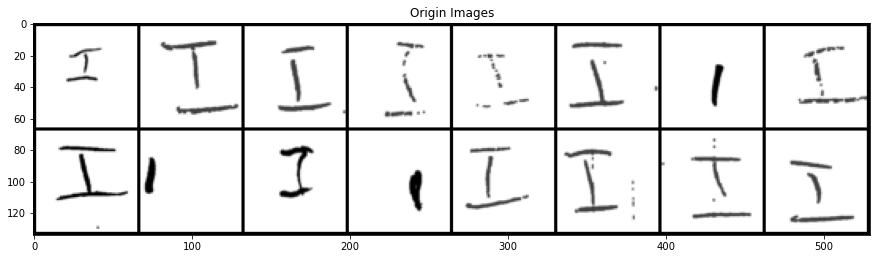

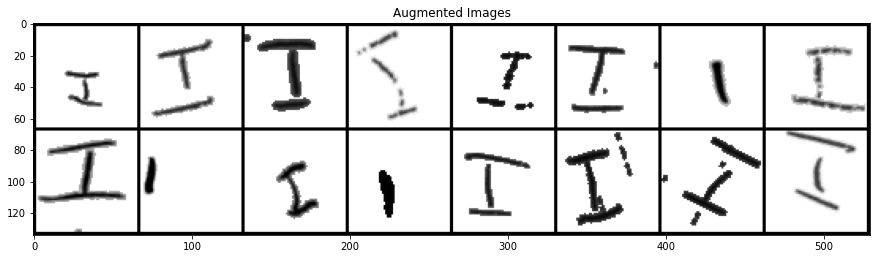

In [152]:
def imshow(inp, title=None):
    """Imshow for Tensors."""
    inp = inp.numpy().transpose((1, 2, 0))
    plt.figure(figsize=(15, 15))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

for i in range(1):
    inputs, labels = next(iter(mynon_augmented_dataloader))
    out = torchvision.utils.make_grid(inputs)
    imshow(out, title="Origin Images")

for i in range(1):
    inputs, labels = next(iter(my_augmented_dataloader))
    out = torchvision.utils.make_grid(inputs)
    imshow(out, title="Augmented Images")